## Preprocessing 
- Dataset: 
    - [Grass(False label)](https://www.kaggle.com/fpeccia/weed-detection-in-soybean-crops)
    - [Common wheat(True label)](https://www.kaggle.com/vbookshelf/v2-plant-seedlings-dataset)
    
- Note: cv image format: w x h x d 

In [271]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [272]:
#Preprocessing: Read all images path  and store it 
#define path
grass_path = r'C:\Users\dnguyen52\Downloads\dataset\dataset\grass\*.tif'
plant_path = r'C:\Users\dnguyen52\Downloads\dataset\dataset\broadleaf\*.tif'
grass_files = [f for f in glob.glob(grass_path)]
plant_files = [f for f in glob.glob(plant_path)]
n_data = len(grass_files) + len(plant_files)
print("Working with %d images|||%d Plants image and %d Grass Image"%(n_data, len(plant_files), len(grass_files)))

n_test = 200 
n_train = n_data - n_test 

train_files = [] 
test_files = [] 

Y_train = np.zeros((n_train, 1))
Y_test = np.zeros((n_test, 1))

#Split into train set and test set then label it all 
for idx, _file in enumerate(glob.glob(grass_path)):
    if(idx < n_test/2): 
        test_files.append(_file)
        Y_test[idx] = 0#label image class
    else: 
        train_files.append(_file) 
        Y_train[int(idx - n_test/2)] = 0#label image class


for idx, _file in enumerate(glob.glob(plant_path)):
    if(idx < n_test/2):
        test_files.append(_file)
        Y_test[idx + int(n_test/2)] = 1#label image class
    else:
        train_files.append(_file) 
        Y_train[int(idx - n_test/2) + len(grass_files)- int(n_test/2)] = 1#label image class
    


Working with 4711 images|||1191 Plants image and 3520 Grass Image


#### Labeling the image and split data into training and testset 


In [273]:
# Image dimension
im_width = 230
im_height = 230 
im_channel = 3

X_train = np.ndarray(shape=(n_train, im_width, im_height, im_channel), dtype=np.uint8)
X_test = np.ndarray(shape=(n_test, im_width, im_height, im_channel), dtype=np.uint8)
i = 0 

#Shuffle training index
train_idxs = np.random.permutation(n_train)
Y_train  = Y_train[train_idxs]

for i, idx in enumerate(train_idxs):
    X_train[i] = cv2.resize(cv2.imread(train_files[idx]),(im_width, im_height))
    
for idx, _file in enumerate(test_files):
    X_test[idx] = cv2.resize(cv2.imread(_file),(im_width, im_height))

print("X_train shape", X_train.shape, "| Y_train shape:", Y_train.shape)
print("X_test shape", X_test.shape, "| Y_test shape:", Y_test.shape)

X_train shape (4511, 230, 230, 3) | Y_train shape: (4511, 1)
X_test shape (200, 230, 230, 3) | Y_test shape: (200, 1)


### Normalize the image. Shift data near mean 


In [188]:
def normalize(x):
    return (x.astype(float) - 128.0) / 128.0

### Visualize some Image

Y: [0.]
Y: [0.]
Y: [1.]
Y: [1.]


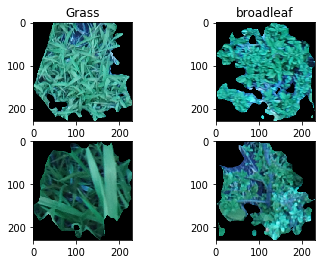

In [270]:
# Visualize some images 
classes = ["Grass", "broadleaf"]
n_class = len(classes)
samples_per_class = 2


for y, cls in enumerate(classes):
    idxes = np.flatnonzero(Y_train == y)
    idxes = np.random.choice(idxes, samples_per_class, replace = False)
    for i, idx in enumerate(idxes):
        plt_idx = i * n_class + y + 1
        plt.subplot(samples_per_class,n_class, plt_idx)
        plt.imshow(X_train[idx])
        if(i==0): plt.title(cls)

plt.show()

799
label [1.]


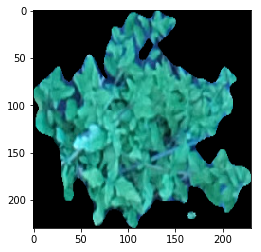

[6 1 5 0 3 4 2]
[0 0 1 1 0 1 0]
